In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import glob

filenamesList = glob.glob('../matrices_CEGAN/base*')
baseMatricesList = np.array(filenamesList)
lastEpoch = np.int16((np.round((baseMatricesList.shape[0]/5)*10,0) - 9) // 10 * 10)
print(baseMatricesList[-1])

../matrices_CEGAN/base_2900_3.npy


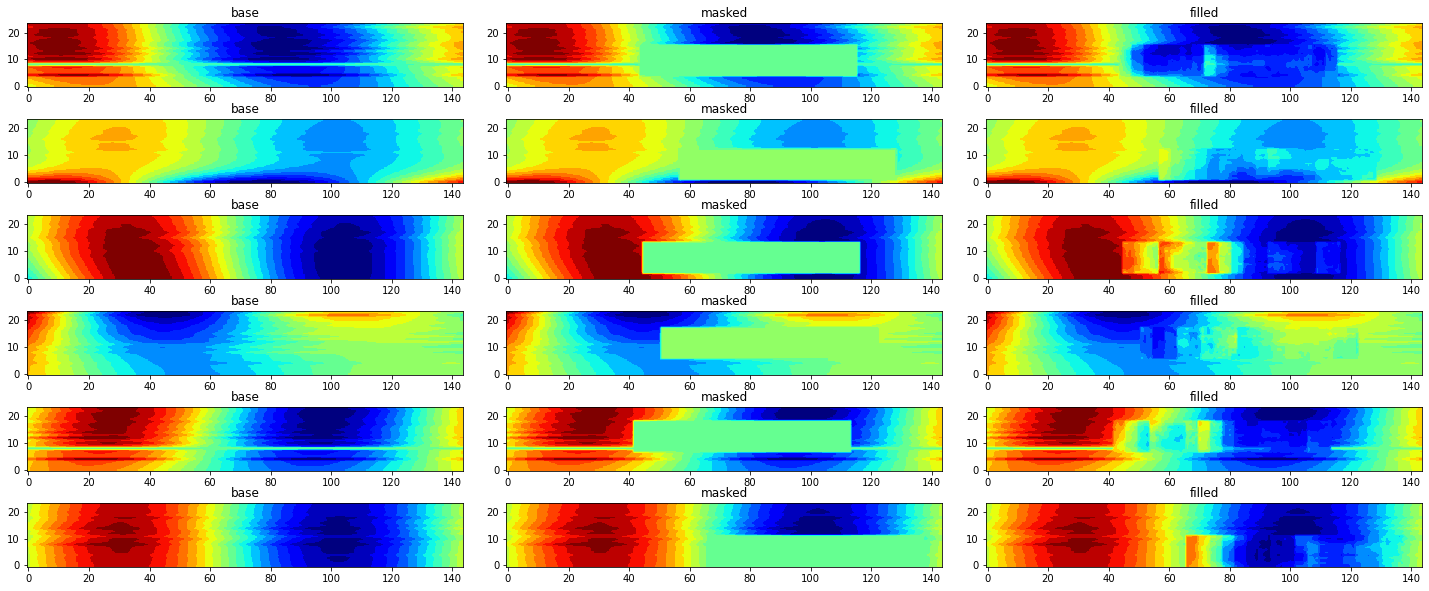

In [40]:
numberOfFiles=0
try: 
    filesXtrain = os.listdir('../matrices_CEGAN/'); 
    numberOfFiles = len(filesXtrain)/3
except: print('File not found')
numberOfFiles-=11

base = np.empty((6,24,144))
filled = np.empty((6,24,144))
masked = np.empty((6,24,144))
epoch = 4900
for i in range(0,6):
    base[i] = np.load('../matrices_CEGAN/base_{}_{}.npy'.format(epoch, i))
    masked[i] = np.load('../matrices_CEGAN/masked_{}_{}.npy'.format(epoch, i))
    filled[i] = np.load('../matrices_CEGAN/filled_{}_{}.npy'.format(epoch, i))

numberOfPlots = 6
fig, axs = plt.subplots(numberOfPlots,3, figsize=(25, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel().reshape(numberOfPlots,3)
for y in range(numberOfPlots):
        axs[y][0].imshow(base[y], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
        axs[y][0].set_title("base")
        axs[y][1].imshow(masked[y], origin='lower', cmap=plt.get_cmap('jet',20) , aspect='auto')
        axs[y][1].set_title("masked")
        axs[y][2].imshow(filled[y], origin='lower', cmap=plt.get_cmap('jet',20) , aspect='auto')
        axs[y][2].set_title("filled")
fig.savefig("CGAN_predictions")